# Setup the directories

In [1]:
import os
base_dir = '/home/ayan/Documents/Computer Vision/Classification/Cat_Vs_Dog/cats_and_dogs_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Data Preprocessing using ImageDataGenerator
ImageDataGenerator converts image files into batches of preprocessed tensors
Note: A Python generator is an object that acts as an iterator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Rescale all pixel values between 0 - 255 to (1, 0)
train_idg = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
test_idg = ImageDataGenerator(rescale = 1./255) #Validation images are not augmented

train_gen = train_idg.flow_from_directory(
    train_dir,
    target_size = (150, 150),       #resize images to (150, 150)
    batch_size = 32,                #32samples per batch i.e. shape = (32, 150, 150, 3)
    class_mode = 'binary'           #since this is a binary classification problem
)

valid_gen = test_idg.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Build the model in functional API way...for fun!
For simple Sequential type models this is not an effective way of representation. 
Wrote just for fun!!

Model: "cat-dog_functional_api_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36

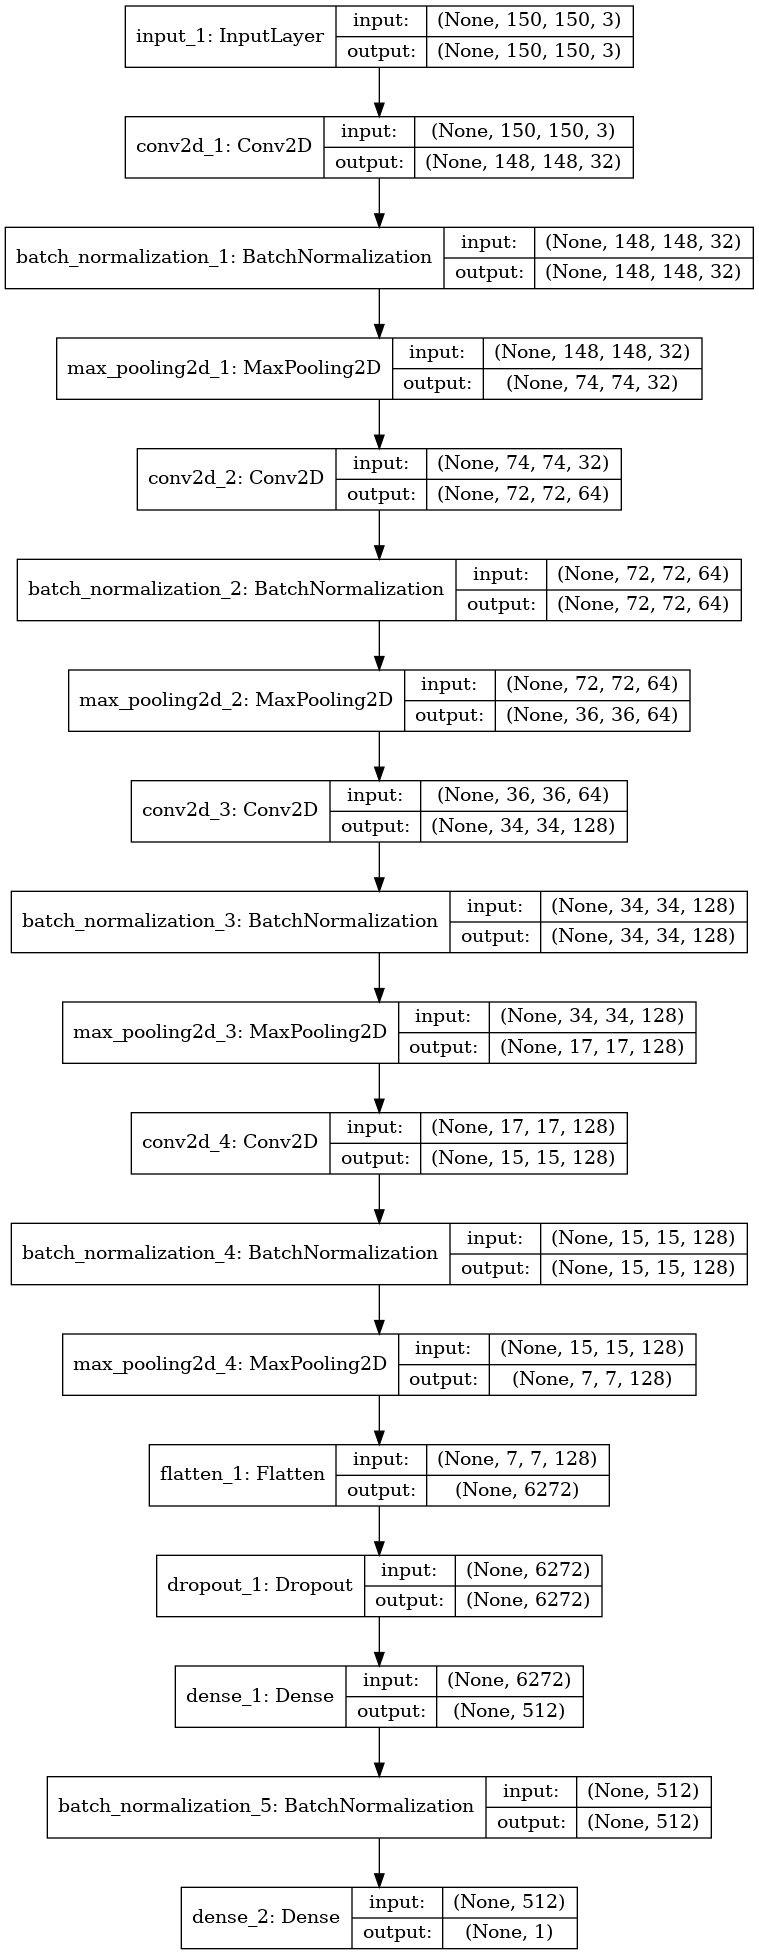

In [3]:
from keras import Input
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from keras import Model

image_inputs = Input(shape = (150, 150, 3))
conv32 = Conv2D(filters = 32, kernel_size = 3, activation = 'relu')
conv64 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu')
conv128_1 = Conv2D(filters = 128, kernel_size = 3, activation = 'relu')
conv128_2 = Conv2D(filters = 128, kernel_size = 3, activation = 'relu')

flatten = Flatten()
dropout = Dropout(0.5)
dense512 = Dense(512, activation = 'relu')

x = conv32(image_inputs) 
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = conv64(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = conv128_1(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = conv128_2(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = flatten(x)
x = dropout(x)
x = dense512(x)
x = BatchNormalization()(x)
output = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = image_inputs, outputs = output, name = 'cat-dog_functional_api_model')

model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'functional_api_convnet.png')

# Setup & configure optimizers

In [4]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

# Use batch generator
'steps_per_epoch' is for telling the fit_generator that it needs to run mentioned number of gradient descent steps before drawing the next epoch batch
'validation_steps' tells the process about number of batches to draw from the validation generator

In [5]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = valid_gen,
    validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 13s 133ms/step - loss: 0.8092 - binary_accuracy: 0.5898 - val_loss: 1.9376 - val_binary_accuracy: 0.4949
Epoch 2/100
100/100 [==============================] - 11s 113ms/step - loss: 0.7251 - binary_accuracy: 0.6468 - val_loss: 2.0025 - val_binary_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 11s 113ms/step - loss: 0.7038 - binary_accuracy: 0.6614 - val_loss: 2.3097 - val_binary_accuracy: 0.5025
Epoch 4/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6605 - binary_accuracy: 0.6856 - val_loss: 1.1156 - val_binary_accuracy: 0.5161
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6483 - binary_accuracy: 0.6809 - val_loss: 0.8172 - val_binary_accuracy: 0.5990
Epoch 6/100
100/100 [==============================] - 12s 123ms/step - loss: 0.6412 - binary_accuracy: 0.7039 - val_loss: 0.4073 - val_binary_accuracy: 0.7320
Epoch 7/100
100/100 [===================

Epoch 52/100
100/100 [==============================] - 13s 125ms/step - loss: 0.3498 - binary_accuracy: 0.8513 - val_loss: 0.4035 - val_binary_accuracy: 0.7861
Epoch 53/100
100/100 [==============================] - 12s 116ms/step - loss: 0.3543 - binary_accuracy: 0.8445 - val_loss: 0.7866 - val_binary_accuracy: 0.7525
Epoch 54/100
100/100 [==============================] - 12s 120ms/step - loss: 0.3506 - binary_accuracy: 0.8527 - val_loss: 0.3679 - val_binary_accuracy: 0.7970
Epoch 55/100
100/100 [==============================] - 11s 113ms/step - loss: 0.3366 - binary_accuracy: 0.8491 - val_loss: 0.2211 - val_binary_accuracy: 0.8230
Epoch 56/100
100/100 [==============================] - 11s 115ms/step - loss: 0.3373 - binary_accuracy: 0.8491 - val_loss: 0.6049 - val_binary_accuracy: 0.8247
Epoch 57/100
100/100 [==============================] - 13s 126ms/step - loss: 0.3306 - binary_accuracy: 0.8545 - val_loss: 0.3669 - val_binary_accuracy: 0.8151
Epoch 58/100
100/100 [============

# Display training vs validation 
This is the same, ok almost, model definition as in "DataAugm_ConvNet_Cat_vs_Dog.ipynb". In this case I have added BatchNormalization layer after each Convolution layer. The output shows a little higher degree of overfitting, not terrible, but overall validation accuracy is higher. Additionally, the loss values are significantly less noisy.

"Even if the data entering a Dense or Conv2D network has a 0 mean and unit variance, there's no reason to expect a priori that this will be the case for the data coming out. Batch normalization is a type of layer that can adaptively normalize data even as the mean and variance change over time during training. It works by internally maintaining an exponential moving average of the batch-wise mean and variance of the data seen during the training. The main effect of batch normalization is that it helps with gradient propagation - much like residual connections - and thus allows for deeper networks." - Francois Chollet

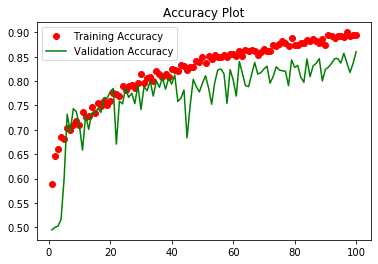

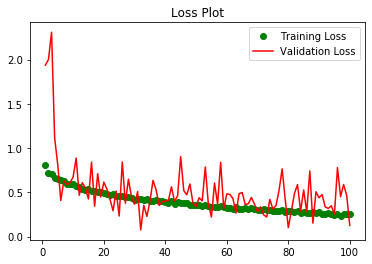

In [7]:
import matplotlib.pyplot as plt
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, 'go', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()